In [8]:
from keras.layers import Input,Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [22]:
#paths to the train, validation and test image datasets 
train_path = '/content/drive/MyDrive/dataset/Garbage-classification/'
valid_path = '/content/drive/MyDrive/dataset/Garbage-classification/'

# extract images to training set by applying data preprocessing and data augmentation
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1)

train_set = train_datagen.flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')


# extract images to validation set
valid_datagen = ImageDataGenerator(validation_split=0.1)

valid_set = valid_datagen.flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
IMAGE_SIZE = [224,224]

In [26]:
mobilenet = MobileNet(input_shape = IMAGE_SIZE + [3],weights = 'imagenet',include_top=False)

In [27]:
for layer in mobilenet.layers:
    layer.trainable = False

In [28]:
folders = glob('/content/drive/MyDrive/dataset/Garbage-classification/*')

In [29]:
x = Flatten()(mobilenet.output)

In [30]:
prediction = Dense(len(folders),activation='softmax')(x)

In [31]:
model = Model(inputs = mobilenet.input,outputs=prediction)

In [32]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [33]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
             metrics = ['accuracy'])

In [34]:
r = model.fit_generator(
  train_set,
  validation_data=valid_set,
  epochs=5,
  steps_per_epoch=len(train_set),
  validation_steps=len(valid_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
143/143 [==============================] - 709s 5s/step - loss: 6.6059 - accuracy: 0.4208 - val_loss: 5.2760 - val_accuracy: 0.5139
Epoch 2/5
143/143 [==============================] - 31s 215ms/step - loss: 3.3749 - accuracy: 0.6424 - val_loss: 3.3366 - val_accuracy: 0.6653
Epoch 3/5
143/143 [==============================] - 31s 216ms/step - loss: 3.1975 - accuracy: 0.6657 - val_loss: 4.4691 - val_accuracy: 0.6534
Epoch 4/5
143/143 [==============================] - 31s 218ms/step - loss: 2.9858 - accuracy: 0.7106 - val_loss: 5.2955 - val_accuracy: 0.6215
Epoch 5/5
143/143 [==============================] - 31s 217ms/step - loss: 3.2614 - accuracy: 0.7077 - val_loss: 4.2715 - val_accuracy: 0.6773


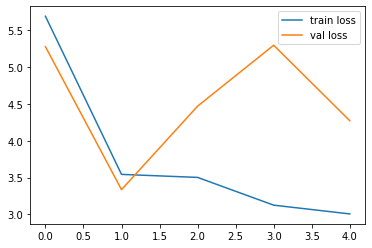

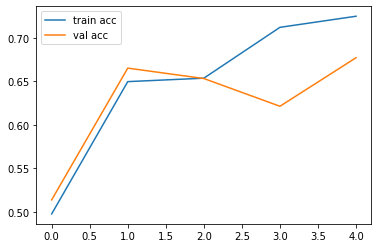

<Figure size 432x288 with 0 Axes>

In [35]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [36]:
import tensorflow as tf
from keras.models import load_model
model.save('/content/drive/MyDrive/dataset/usingmodel/mobilenetmodel.h5')

In [1]:
#import cv2
CATEGORIES = ["cardboard","glass","metal","paper","plastic","trash"]

In [2]:
import tensorflow as tf
model = tf.keras.models.load_model("mobilenetmodel.h5")

In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [7]:
image = load_img('usingmodel/plastic.jpg',target_size = (224,224))
#convert the image pixels into numpy array
image = img_to_array(image)
#reshape data for the model
image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
image = preprocess_input(image)
y = model.predict(image)
pred = np.argmax(y[0])
print(CATEGORIES[pred])

glass
